### 2.1 Univariate regressio on analytical functions


In [1]:
#Import the 

import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In this exercise you will build a regression model to approximate several analytical functions. Then, you
will evaluate and discuss the quality of your models with the final goal to optimize their respective hyperparameters. The studied functions will be:

Use the following snippet of code to create you initial dataset. Note that f(x) should match one of
the functions mentioned before.


In [2]:
def f1(x):
    return x * np.sin(x) + 2 * x

def f2(x):
    return 10 * np.sin(x) + x ** 2

def f3(x):
    return np.sign(x) * (x ** 2 + 300) + 20 * np.sin(x)

In [15]:
tr = 20
n_samples = 100

def generate_dataset(function, tr, n_samples)-> tuple:
    X = np.linspace(-tr, tr, n_samples)
    y = function(X)
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=42, shuffle=True
    )
    y_test = y_test[X_test.argsort()]
    X_test.sort()
    return (X, y), (X_train, X_test, y_train, y_test)

In [17]:
Values1, ds1 = generate_dataset(f1, tr, n_samples)
Values2, ds2 = generate_dataset(f2, tr, n_samples)
Values3, ds3 = generate_dataset(f3, tr, n_samples)

DATASETS = {'f1': ds1, 'f2': ds2, 'f3': ds3}
VALUES = {'f1': Values1, 'f2': Values2, 'f3': Values3}

Draw and inspect the shape of the function. Which regression model of those you know could achieve
better performance?


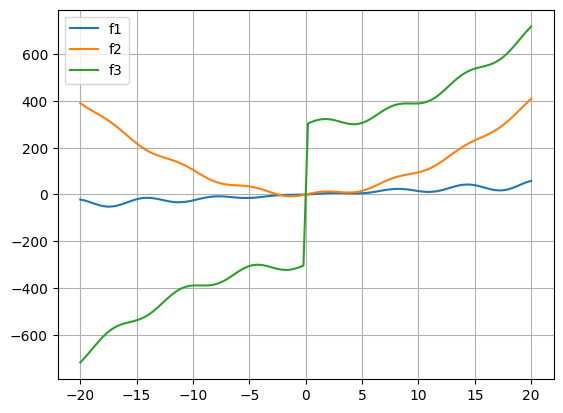

In [19]:
fig, ax = plt.subplots()

for i in VALUES.keys():
    ax.plot(VALUES[i][0], VALUES[i][1], label=i)

ax.legend()
ax.grid()
plt.show()

Frame now a regression task to your generated data. Start from the ordinary least squares Linear
Regression. Then, choose additional models which you believe could outperform linear regression
to approximate the function.


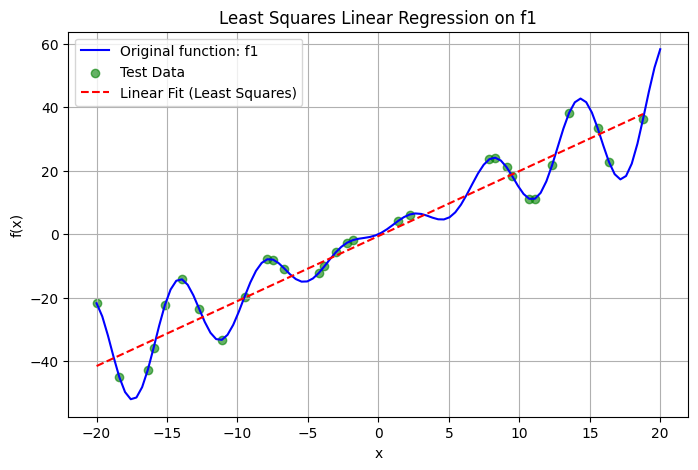

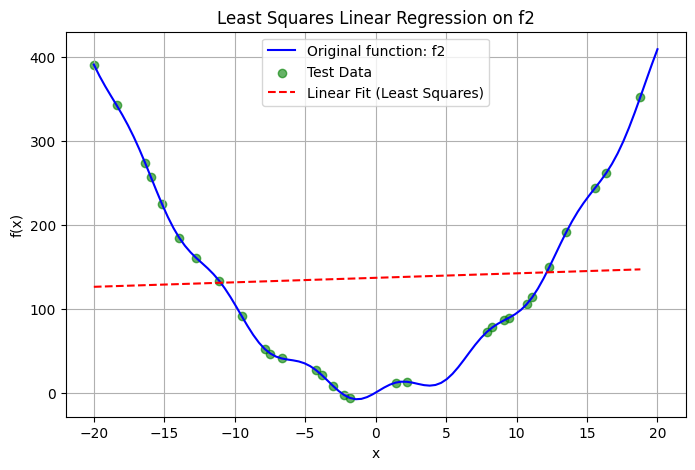

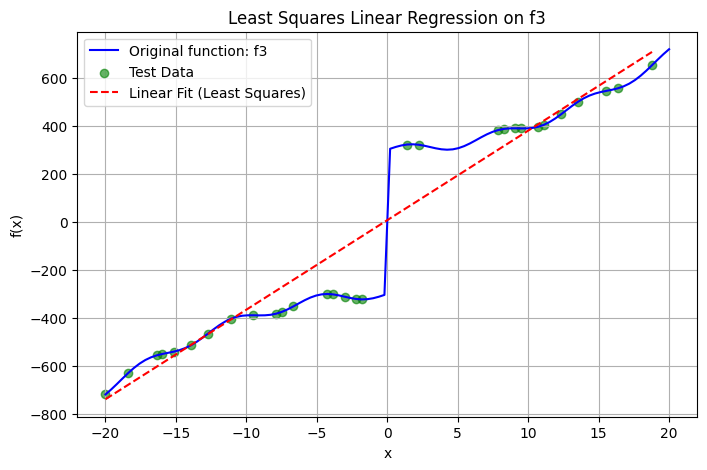

In [22]:
from sklearn.linear_model import LinearRegression

#Reshape data

for i in DATASETS.keys():
    X_train = DATASETS[i][0]
    X_test = DATASETS[i][1]
    y_train = DATASETS[i][2]
    y_test = DATASETS[i][3]
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)


    model = LinearRegression()

    #Train the model
    model.fit(X_train, y_train)


    #Predict on the data
    y_pred = model.predict(X_test)

    plt.figure(figsize=(8, 5))
    plt.plot(VALUES[i][0], VALUES[i][1], label=f"Original function: {i}", color='blue')
    plt.scatter(X_test, y_test, color='green', label="Test Data", alpha=0.6)
    plt.plot(X_test, y_pred, label="Linear Fit (Least Squares)", color='red', linestyle='--')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f'Least Squares Linear Regression on {i}')
    plt.legend()
    plt.grid(True)
    plt.show()

Train MLPRegressor and RandomForest.

Check it against Least Squares

Evaluate your regression outcome in terms of a metric of your choice. Refer to sklearn.metrics
module to find some. Does any model stand out in terms of regression quality in every case or the
shape of the function favors (or penalizes) any of them?

-Yes, The Random Forest stood out the most. Followed by the SVR

c:\Users\local_user\anaconda3\envs\ELTE\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


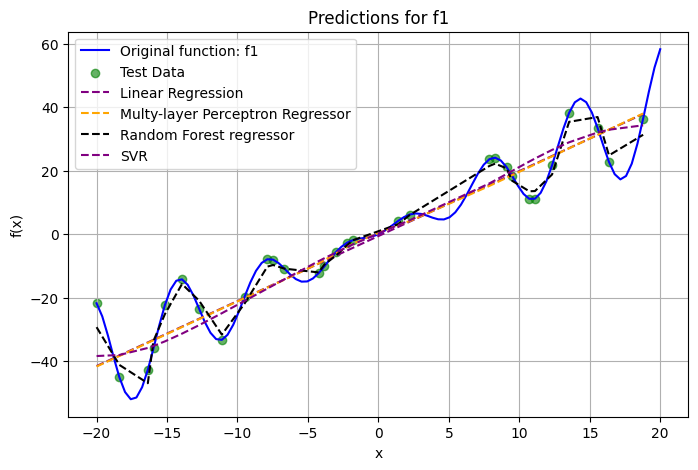

Results for f1
Least Squares Regressor - Mean Squared Error (MSE): 57.4203, R²: 0.8920
MLP Regressor - Mean Squared Error (MSE): 57.5826, R²: 0.8917
Random Forest Regressor - Mean Squared Error (MSE): 7.0098, R²: 0.9868
SVR - Mean Squared Error (MSE): 57.3689, R²: 0.8921


c:\Users\local_user\anaconda3\envs\ELTE\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


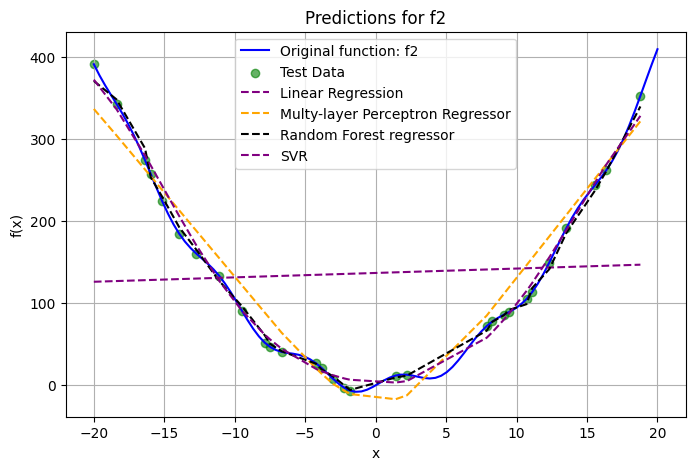

Results for f2
Least Squares Regressor - Mean Squared Error (MSE): 12926.8062, R²: -0.0187
MLP Regressor - Mean Squared Error (MSE): 671.0905, R²: 0.9471
Random Forest Regressor - Mean Squared Error (MSE): 46.3123, R²: 0.9964
SVR - Mean Squared Error (MSE): 117.0405, R²: 0.9908


c:\Users\local_user\anaconda3\envs\ELTE\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


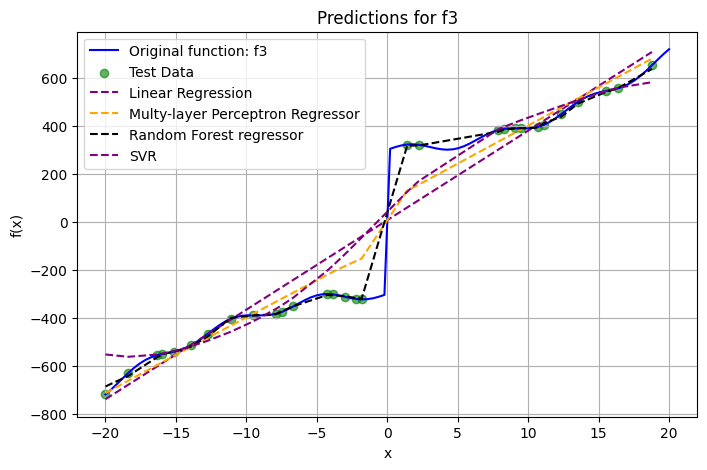

Results for f3
Least Squares Regressor - Mean Squared Error (MSE): 13568.7639, R²: 0.9322
MLP Regressor - Mean Squared Error (MSE): 5827.3827, R²: 0.9709
Random Forest Regressor - Mean Squared Error (MSE): 71.5870, R²: 0.9996
SVR - Mean Squared Error (MSE): 9647.3555, R²: 0.9518


In [29]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


#Initialize the models
mlpmodel = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000)
randomforestmodel = RandomForestRegressor(random_state=42, n_estimators=100)
svrmodel = SVR(kernel='rbf', C=100, epsilon=0.1)
linearmodel = LinearRegression()


for i in DATASETS.keys():
    X_train = DATASETS[i][0]
    X_test = DATASETS[i][1]
    y_train = DATASETS[i][2]
    y_test = DATASETS[i][3]
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)

    #Train the model
    mlpmodel.fit(X_train, y_train)
    randomforestmodel.fit(X_train, y_train)
    svrmodel.fit(X_train, y_train)
    linearmodel.fit(X_train, y_train)


    #Predict with model
    y_pred_mlp = mlpmodel.predict(X_test)
    y_pred_randomforest = randomforestmodel.predict(X_test)
    y_pred_svr = svrmodel.predict(X_test)
    y_pred_linear = linearmodel.predict(X_test)


    #Plot the results
    plt.figure(figsize=(8, 5))
    plt.plot(VALUES[i][0], VALUES[i][1], label=f"Original function: {i}", color='blue')
    plt.scatter(X_test, y_test, color='green', label="Test Data", alpha=0.6)
    plt.plot(X_test, y_pred_linear, label="Linear Regression", color='purple', linestyle='--')
    plt.plot(X_test, y_pred_mlp, label="Multy-layer Perceptron Regressor", color='orange', linestyle='--')
    plt.plot(X_test, y_pred_randomforest, label="Random Forest regressor", color='black', linestyle='--')
    plt.plot(X_test, y_pred_svr, label="SVR", color='purple', linestyle='--')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f'Predictions for {i}')
    plt.legend()
    plt.grid(True)
    plt.show()


    # Mean Squared Error (MSE)
    mse_ls = mean_squared_error(y_test, y_pred_linear)
    mse_mlp = mean_squared_error(y_test, y_pred_mlp)
    mse_rf = mean_squared_error(y_test, y_pred_randomforest)
    mse_svr = mean_squared_error(y_test, y_pred_svr)

    # R-squared (R²)
    r2_ls = r2_score(y_test, y_pred_linear)
    r2_mlp = r2_score(y_test, y_pred_mlp)
    r2_rf = r2_score(y_test, y_pred_randomforest)
    r2_svr = r2_score(y_test, y_pred_svr)

    print(f"Results for {i}")
    print(f"Least Squares Regressor - Mean Squared Error (MSE): {mse_ls:.4f}, R²: {r2_ls:.4f}")
    print(f"MLP Regressor - Mean Squared Error (MSE): {mse_mlp:.4f}, R²: {r2_mlp:.4f}")
    print(f"Random Forest Regressor - Mean Squared Error (MSE): {mse_rf:.4f}, R²: {r2_rf:.4f}")
    print(f"SVR - Mean Squared Error (MSE): {mse_svr:.4f}, R²: {r2_svr:.4f}")


Back in Point 2, you could visually inspect the function shape1
Although this is not always the
case, you can exploit this sort of knowledge to enhance your initial representation. With this in
mind, choose a set of new features (e.g. polynomials, trigonometric functions) and introduce them
in training data. Then, test again your best performing model and discuss whether your scores have
improved or worsened.

In [30]:
from sklearn.preprocessing import PolynomialFeatures

def add_new_features(X):

    #Add polynomial Features
    X_poly = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X.reshape(-1, 1))
    #Add trigonometric features
    sin_X = np.sin(X).reshape(-1, 1)
    cos_X = np.cos(X).reshape(-1, 1)
    #Stack them together
    X_new = np.hstack([X_poly, sin_X, cos_X])
    return X_new

In [32]:
#Create the new models

for i in DATASETS.keys():
    X_train = DATASETS[i][0]
    X_test = DATASETS[i][1]
    y_train = DATASETS[i][2]
    y_test = DATASETS[i][3]
    X_train_new = add_new_features(X_train)
    X_test_new = add_new_features(X_test)

    #Create new randomforest regressor - The Random Forest was the best previoulsy
    model_new_randomforest = RandomForestRegressor(random_state=42, n_estimators=100)

    model_new_randomforest.fit(X_train_new, y_train)
    y_pred_new_randomforest = model_new_randomforest.predict(X_test_new)

    mse_new_rf = mean_squared_error(y_test, y_pred_new_randomforest)
    r2_new_rf = r2_score(y_test, y_pred_new_randomforest)

    print(f"Results for {i}")
    print(f"Random Forest with New Features: MSE = {mse_new_rf:.3f}, R² = {r2_new_rf:.3f}")

Results for f1
Random Forest with New Features: MSE = 7.590, R² = 0.986
Results for f2
Random Forest with New Features: MSE = 75.099, R² = 0.994
Results for f3
Random Forest with New Features: MSE = 129.041, R² = 0.999


### 2.2 Multivariate regression on synthetic data

In [33]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=2000, random_state=42)


Test the regression pipeline that you developed in Exercise 2.1. Pay enough attention to the differences with the previous exercise:


• Is there any correlation among features? How does this impact the model performance? Minimal or 0 Correlation can be seen.


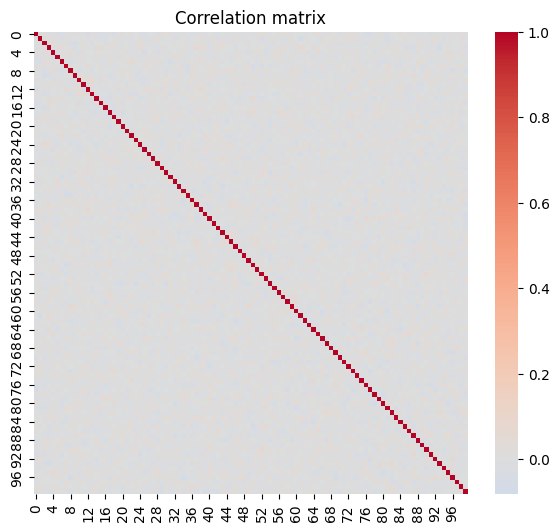

In [58]:
#Spilt the data into test and train
import pandas as pd

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
X, y, train_size=0.7, random_state=42, shuffle=True
)


#Check for correlation
dfdata = pd.DataFrame(X_train)

sub_corr = pd.DataFrame(X).corr()
#Show correlation
plt.figure(figsize=(7, 6))
sns.heatmap(sub_corr, cmap="coolwarm", center=0)
plt.title("Correlation matrix")
plt.show()

In [36]:
#Train the original models

mlpmodel.fit(X_train_multi, y_train_multi)
randomforestmodel.fit(X_train_multi, y_train_multi)
svrmodel.fit(X_train_multi, y_train_multi)


#Predict with model
y_pred_mlp_multi = mlpmodel.predict(X_test_multi)
y_pred_randomforest_multi = randomforestmodel.predict(X_test_multi)
y_pred_svr_multi = svrmodel.predict(X_test_multi)


mse_mlp_multi = mean_squared_error(y_test_multi, y_pred_mlp_multi)
mse_rf_multi = mean_squared_error(y_test_multi, y_pred_randomforest_multi)
mse_svr_multi = mean_squared_error(y_test_multi, y_pred_svr_multi)

# R-squared (R²)
r2_mlp_multi = r2_score(y_test_multi, y_pred_mlp_multi)
r2_rf_multi = r2_score(y_test_multi, y_pred_randomforest_multi)
r2_svr_multi = r2_score(y_test_multi, y_pred_svr_multi)


print(f"MLP Regressor - Mean Squared Error (MSE): {mse_mlp_multi:.4f}, R²: {r2_mlp_multi:.4f}")
print(f"Random Forest Regressor - Mean Squared Error (MSE): {mse_rf_multi:.4f}, R²: {r2_rf_multi:.4f}")
print(f"SVR - Mean Squared Error (MSE): {mse_svr_multi:.4f}, R²: {r2_svr_multi:.4f}")

MLP Regressor - Mean Squared Error (MSE): 642.3109, R²: 0.9840
Random Forest Regressor - Mean Squared Error (MSE): 10706.5890, R²: 0.7327
SVR - Mean Squared Error (MSE): 1964.1434, R²: 0.9510


Using the function constructor, make the problem harder for your regression model. Try to regenerate
the dataset adding some noise using the noise parameter and to increase or reduce the gap between
n_features and n_informative features.

• How does the model behave in this case?


• Train a Linear Regressor and inspect the coefficients learned for the non-informative features.
What do these values mean?


In [37]:
#Add Noise and double the informative features
X_noise_more, y_noise_more = make_regression(n_samples=2000, random_state=42, noise=10, n_informative=20)

#Add Noise and half the informative features
X_noise_less, y_noise_less = make_regression(n_samples=2000, random_state=42, noise=10, n_informative=5)

#Split them to train and test
X_train_multi_more, X_test_multi_more, y_train_multi_more, y_test_multi_more = train_test_split(
X_noise_more, y_noise_more, train_size=0.7, random_state=42, shuffle=True
)


X_train_multi_less, X_test_multi_less, y_train_multi_less, y_test_multi_less = train_test_split(
X_noise_less, y_noise_less, train_size=0.7, random_state=42, shuffle=True
)




## First train and test the less informative

In [38]:
#Train the original models
mlpmodel.fit(X_train_multi_less, y_train_multi_less)
randomforestmodel.fit(X_train_multi_less, y_train_multi_less)
svrmodel.fit(X_train_multi_less, y_train_multi_less)


#Predict with model
y_pred_mlp_multi_less = mlpmodel.predict(X_test_multi_less)
y_pred_randomforest_multi_less = randomforestmodel.predict(X_test_multi_less)
y_pred_svr_multi_less = svrmodel.predict(X_test_multi_less)


mse_mlp_multi_less = mean_squared_error(y_test_multi_less, y_pred_mlp_multi_less)
mse_rf_multi_less = mean_squared_error(y_test_multi_less, y_pred_randomforest_multi_less)
mse_svr_multi_less = mean_squared_error(y_test_multi_less, y_pred_svr_multi_less)

# R-squared (R²)
r2_mlp_multi_less = r2_score(y_test_multi_less, y_pred_mlp_multi_less)
r2_rf_multi_less = r2_score(y_test_multi_less, y_pred_randomforest_multi_less)
r2_svr_multi_less = r2_score(y_test_multi_less, y_pred_svr_multi_less)


print(f"MLP Regressor - Mean Squared Error (MSE) + Noise + Less Iinformative: {mse_mlp_multi_less:.4f}, R²: {r2_mlp_multi_less:.4f}")
print(f"Random Forest Regressor - Mean Squared Error (MSE) + Noise + Less Informative: {mse_rf_multi_less:.4f}, R²: {r2_rf_multi_less:.4f}")
print(f"SVR - Mean Squared Error (MSE) + Noise + Less Informative: {mse_svr_multi_less:.4f}, R²: {r2_svr_multi_less:.4f}")

MLP Regressor - Mean Squared Error (MSE) + Noise + Less Iinformative: 769.3303, R²: 0.9710
Random Forest Regressor - Mean Squared Error (MSE) + Noise + Less Informative: 3191.8155, R²: 0.8795
SVR - Mean Squared Error (MSE) + Noise + Less Informative: 1274.1157, R²: 0.9519


## First train and test the more informative

In [39]:
#Train the original models
mlpmodel.fit(X_train_multi_more, y_train_multi_more)
randomforestmodel.fit(X_train_multi_more, y_train_multi_more)
svrmodel.fit(X_train_multi_more, y_train_multi_more)


#Predict with model
y_pred_mlp_multi_more = mlpmodel.predict(X_test_multi_more)
y_pred_randomforest_multi_more = randomforestmodel.predict(X_test_multi_more)
y_pred_svr_multi_more = svrmodel.predict(X_test_multi_more)


mse_mlp_multi_more = mean_squared_error(y_test_multi_more, y_pred_mlp_multi_more)
mse_rf_multi_more = mean_squared_error(y_test_multi_more, y_pred_randomforest_multi_more)
mse_svr_multi_more = mean_squared_error(y_test_multi_more, y_pred_svr_multi_more)

# R-squared (R²)
r2_mlp_multi_more = r2_score(y_test_multi_more, y_pred_mlp_multi_more)
r2_rf_multi_more = r2_score(y_test_multi_more, y_pred_randomforest_multi_more)
r2_svr_multi_more = r2_score(y_test_multi_more, y_pred_svr_multi_more)


print(f"MLP Regressor - Mean Squared Error (MSE) + Noise + More Informative: {mse_mlp_multi_more:.4f}, R²: {r2_mlp_multi_more:.4f}")
print(f"Random Forest Regressor - Mean Squared Error (MSE) + Noise + More Informative: {mse_rf_multi_more:.4f}, R²: {r2_rf_multi_more:.4f}")
print(f"SVR - Mean Squared Error (MSE) + Noise + More Informative: {mse_svr_multi_more:.4f}, R²: {r2_svr_multi_more:.4f}")

MLP Regressor - Mean Squared Error (MSE) + Noise + More Informative: 621.4708, R²: 0.9929
Random Forest Regressor - Mean Squared Error (MSE) + Noise + More Informative: 37509.8841, R²: 0.5685
SVR - Mean Squared Error (MSE) + Noise + More Informative: 5917.2927, R²: 0.9319


## Summary of the models

In [40]:
print("BASE SETUP")
print("-"*100)
print(f"MLP Regressor - Mean Squared Error (MSE): {mse_mlp_multi:.4f}, R²: {r2_mlp_multi:.4f}")
print(f"Random Forest Regressor - Mean Squared Error (MSE): {mse_rf_multi:.4f}, R²: {r2_rf_multi:.4f}")
print(f"SVR - Mean Squared Error (MSE): {mse_svr_multi:.4f}, R²: {r2_svr_multi:.4f}")

print("-"*100)
print("BASE SETUP + Noise + Less Informative")
print("-"*100)
print(f"MLP Regressor - Mean Squared Error (MSE) + Noise + Less Iinformative: {mse_mlp_multi_less:.4f}, R²: {r2_mlp_multi_less:.4f}")
print(f"Random Forest Regressor - Mean Squared Error (MSE) + Noise + Less Informative: {mse_rf_multi_less:.4f}, R²: {r2_rf_multi_less:.4f}")
print(f"SVR - Mean Squared Error (MSE) + Noise + Less Informative: {mse_svr_multi_less:.4f}, R²: {r2_svr_multi_less:.4f}")

print("-"*100)
print("BASE SETUP + Noise + More Informative")
print("-"*100)
print(f"MLP Regressor - Mean Squared Error (MSE) + Noise + More Informative: {mse_mlp_multi_more:.4f}, R²: {r2_mlp_multi_more:.4f}")
print(f"Random Forest Regressor - Mean Squared Error (MSE) + Noise + More Informative: {mse_rf_multi_more:.4f}, R²: {r2_rf_multi_more:.4f}")
print(f"SVR - Mean Squared Error (MSE) + Noise + More Informative: {mse_svr_multi_more:.4f}, R²: {r2_svr_multi_more:.4f}")

BASE SETUP
----------------------------------------------------------------------------------------------------
MLP Regressor - Mean Squared Error (MSE): 642.3109, R²: 0.9840
Random Forest Regressor - Mean Squared Error (MSE): 10706.5890, R²: 0.7327
SVR - Mean Squared Error (MSE): 1964.1434, R²: 0.9510
----------------------------------------------------------------------------------------------------
BASE SETUP + Noise + Less Informative
----------------------------------------------------------------------------------------------------
MLP Regressor - Mean Squared Error (MSE) + Noise + Less Iinformative: 769.3303, R²: 0.9710
Random Forest Regressor - Mean Squared Error (MSE) + Noise + Less Informative: 3191.8155, R²: 0.8795
SVR - Mean Squared Error (MSE) + Noise + Less Informative: 1274.1157, R²: 0.9519
----------------------------------------------------------------------------------------------------
BASE SETUP + Noise + More Informative
--------------------------------------------

## Train a Linear Regressor

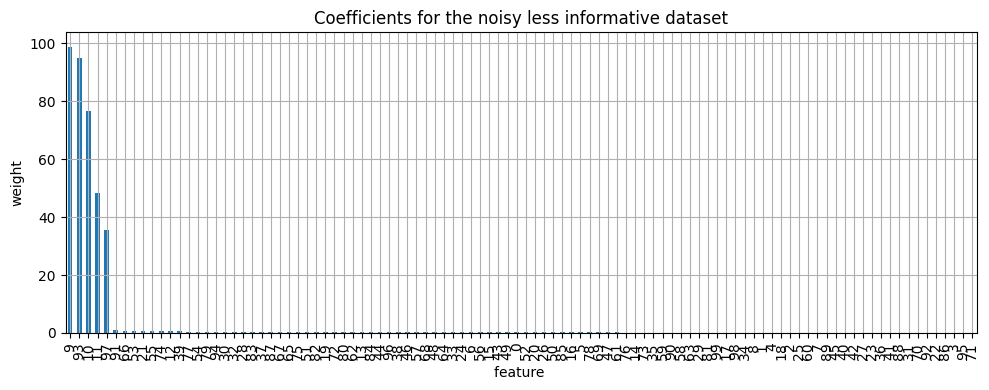

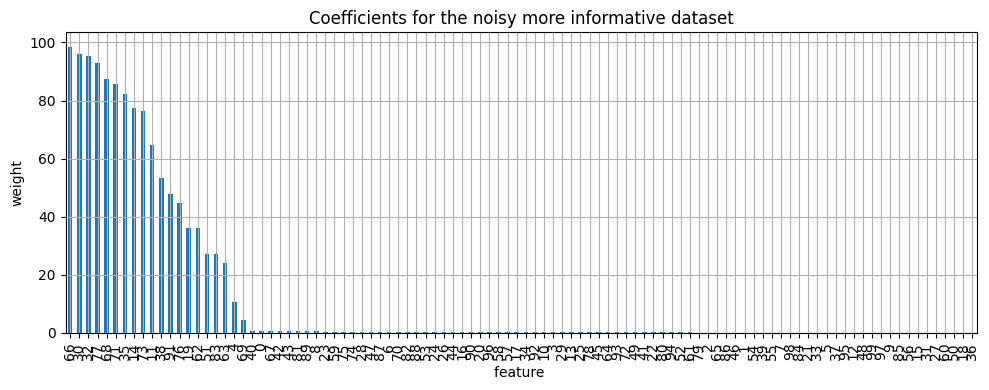

In [44]:
model_newlin_less = LinearRegression()
model_newlin_more = LinearRegression()

#First fit the less
model_newlin_less.fit(X_train_multi_less, y_train_multi_less)
coefficients_less = pd.Series(model_newlin_less.coef_)

plt.figure(figsize=(10, 4))
coefficients_less.abs().sort_values(ascending=False).plot(kind="bar")
plt.title("Coefficients for the noisy less informative dataset")
plt.xlabel("feature ")
plt.ylabel("weight")
plt.tight_layout()
plt.grid()
plt.show()


model_newlin_more.fit(X_train_multi_more, y_train_multi_more)
coefficients_more = pd.Series(model_newlin_more.coef_)


plt.figure(figsize=(10, 4))
coefficients_more.abs().sort_values(ascending=False).plot(kind="bar")
plt.title("Coefficients for the noisy more informative dataset")
plt.xlabel("feature ")
plt.ylabel("weight")
plt.tight_layout()
plt.grid()
plt.show()


Train a Linear Regressor and inspect the coefficients learned for the non-informative features.
What do these values mean?

    - It means, that it learned minimal or nothing from them.

### 2.3 Temperature series forecasting

Load the Second World War Weather dataset. In particular you have to load the data contained in
Summaryof Weather.csv.


In [45]:
weatherdatat = pd.read_csv("weatherww2\weatherww2\SummaryofWeather.csv")
print(weatherdatat)

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\local_user\AppData\Local\Temp\ipykernel_21688\607677018.py:1: SyntaxWarning: invalid escape sequence '\w'
  weatherdatat = pd.read_csv("weatherww2\weatherww2\SummaryofWeather.csv")


          STA        Date Precip  WindGustSpd    MaxTemp    MinTemp  \
0       10001    1942-7-1  1.016          NaN  25.555556  22.222222   
1       10001    1942-7-2      0          NaN  28.888889  21.666667   
2       10001    1942-7-3   2.54          NaN  26.111111  22.222222   
3       10001    1942-7-4   2.54          NaN  26.666667  22.222222   
4       10001    1942-7-5      0          NaN  26.666667  21.666667   
...       ...         ...    ...          ...        ...        ...   
119035  82506  1945-12-27      0          NaN  28.333333  18.333333   
119036  82506  1945-12-28  9.906          NaN  29.444444  18.333333   
119037  82506  1945-12-29      0          NaN  28.333333  18.333333   
119038  82506  1945-12-30      0          NaN  28.333333  18.333333   
119039  82506  1945-12-31      0          NaN  29.444444  17.222222   

         MeanTemp Snowfall PoorWeather  YR  ...  FB  FTI ITH  PGT  TSHDSBRSGF  \
0       23.888889      0.0         NaN  42  ... NaN  NaN NaN  NaN 

C:\Users\local_user\AppData\Local\Temp\ipykernel_21688\607677018.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  weatherdatat = pd.read_csv("weatherww2\weatherww2\SummaryofWeather.csv")



Top 10 sensors id:
 [22508, 10701, 22502, 22504, 10803, 11610, 16405, 11601, 10502, 11604]


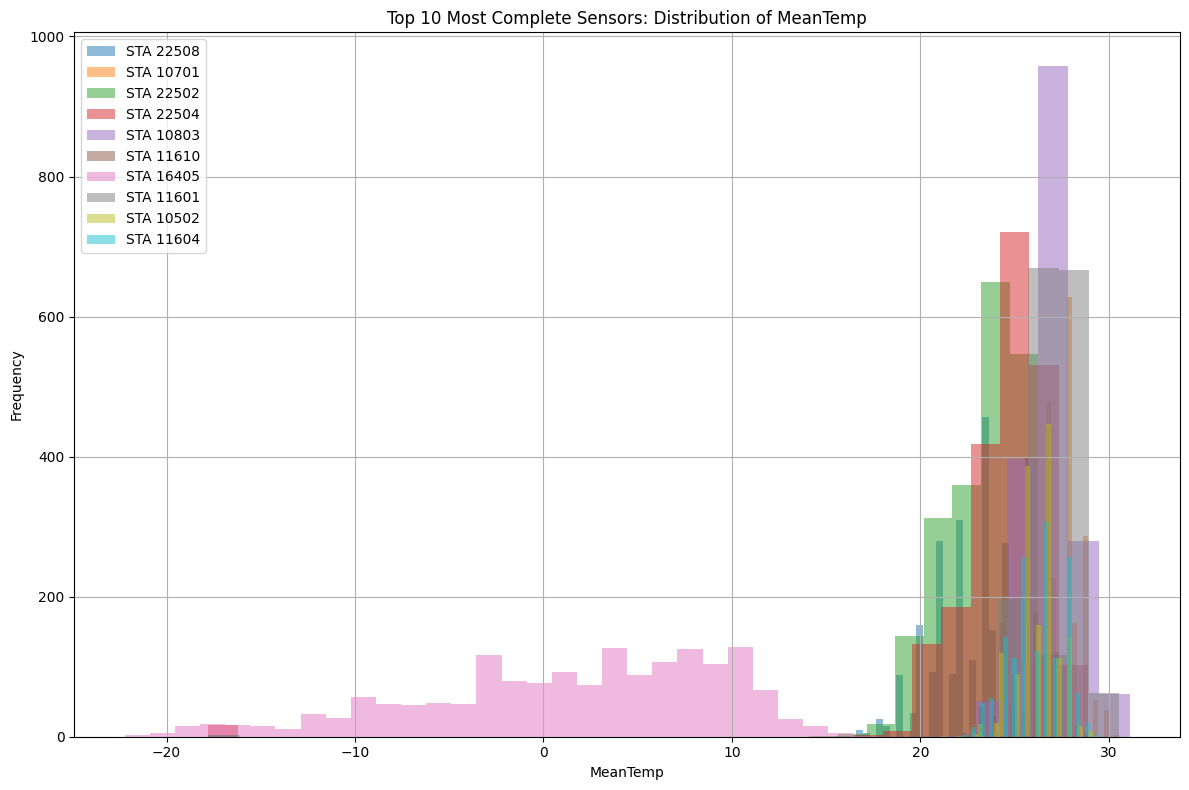

In [46]:
#Check for every missing value
missing_summary = weatherdatat.isnull().sum()
#print("Missing values per column:\n", missing_summary)


#Check for which sensor has the most data, and select the top 10 for it
sensor_completeness = weatherdatat.groupby('STA')['MeanTemp'].count().sort_values(ascending=False)
top_10_sensors = sensor_completeness.head(10).index
print("\nTop 10 sensors id:\n", top_10_sensors.tolist())


#Only work with the top sensors data
top_sensors_data = weatherdatat[weatherdatat['STA'].isin(top_10_sensors)]
plt.figure(figsize=(12, 8))
for sta in top_10_sensors:
    subset = top_sensors_data[top_sensors_data['STA'] == sta]
    plt.hist(subset['MeanTemp'].dropna(), bins=30, alpha=0.5, label=f'STA {sta}')

plt.title('Top 10 Most Complete Sensors: Distribution of MeanTemp')
plt.xlabel('MeanTemp')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

For simplicity, we will exploit the data collected by a specific sensor. Filter the data by STA (Station)
and extract the mean temperature measurements corresponding to sensor with id 22508. See 1.1
for more details on this sensor.


In [47]:
NeededSensorDf = weatherdatat[weatherdatat['STA'] == 22508]
NeededSensorDf['Date'] = pd.to_datetime(NeededSensorDf['Date'], errors='coerce')
print(NeededSensorDf)
print(NeededSensorDf.dtypes)

         STA       Date Precip  WindGustSpd    MaxTemp    MinTemp   MeanTemp  \
57877  22508 1940-01-01  0.254          NaN  23.333333  17.222222  20.000000   
57878  22508 1940-01-02  10.16          NaN  23.333333  16.111111  19.444444   
57879  22508 1940-01-03      T          NaN  23.888889  15.555556  20.000000   
57880  22508 1940-01-04  2.286          NaN  23.888889  18.333333  21.111111   
57881  22508 1940-01-05  0.254          NaN  22.222222  15.000000  18.333333   
...      ...        ...    ...          ...        ...        ...        ...   
60064  22508 1945-12-27      0          NaN  26.666667  14.444444  20.555556   
60065  22508 1945-12-28      0          NaN  27.222222  15.000000  21.111111   
60066  22508 1945-12-29      T          NaN  25.000000  14.444444  20.000000   
60067  22508 1945-12-30      0          NaN  25.555556  16.666667  21.111111   
60068  22508 1945-12-31      0          NaN  27.222222  16.111111  21.666667   

      Snowfall PoorWeather  YR  ...  FB

C:\Users\local_user\AppData\Local\Temp\ipykernel_21688\1580920145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NeededSensorDf['Date'] = pd.to_datetime(NeededSensorDf['Date'], errors='coerce')


Now you should have an array containing all the measurements collected by sensor 22508 representing the time series of the mean temperatures. Plot the temperatures time series exploiting matplotlib
and show on the x axis the corresponding datetimes.

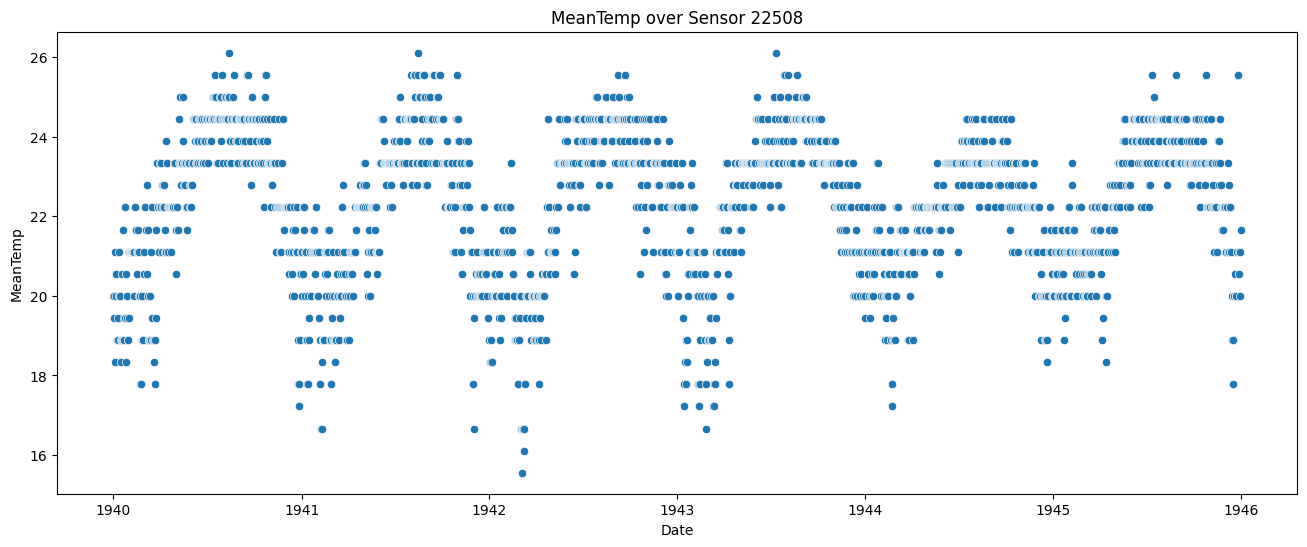

In [48]:
plt.figure(figsize=(16, 6))
sns.scatterplot(NeededSensorDf, x="Date", y="MeanTemp")
plt.title("MeanTemp over Sensor 22508")
plt.show()

To predict the next day temperature, a rolling window pre-processing should be performed to convert
the time series into a structured dataset. The rolling windows on the time series can be applied by
extracting, from the original time series, a window of length W that moves over the series, with step
1, like the example showed in Figure 3. The dependent variable to be predicted will be the value
positioned at t + W + 1, where t is the position of the rolling window. The final structure of the
dataset extracted with the rolling window will be similar to the one showed in Table 1.


In [50]:
#Create a new data, where only use the date and the mean temp.

df = NeededSensorDf[['Date', 'MeanTemp']].copy()
df.set_index('Date', inplace=True)
df = df.sort_index()
#check for empty
print(df.isnull().sum())
print(len(df))
print(df)

MeanTemp    0
dtype: int64
2192
             MeanTemp
Date                 
1940-01-01  20.000000
1940-01-02  19.444444
1940-01-03  20.000000
1940-01-04  21.111111
1940-01-05  18.333333
...               ...
1945-12-27  20.555556
1945-12-28  21.111111
1945-12-29  20.000000
1945-12-30  21.111111
1945-12-31  21.666667

[2192 rows x 1 columns]


In [51]:
#Use a 7 that represents a week
W = 7

records = []

for i in range(W, len(df)):
    window = df['MeanTemp'].iloc[i-W:i].values
    target_date = df.index[i]  # the date of the target (t+W)
    record = dict(zip([f'lag_{j+1}' for j in range(W)], window))
    record['target'] = df['MeanTemp'].iloc[i]  # target is value at t+W
    records.append((target_date, record))

# Build the new structured DataFrame
finaldf = pd.DataFrame(
    data=[r[1] for r in records],
    index=[r[0] for r in records]
)

print(finaldf)



                lag_1      lag_2      lag_3      lag_4      lag_5      lag_6  \
1940-01-08  20.000000  19.444444  20.000000  21.111111  18.333333  20.000000   
1940-01-09  19.444444  20.000000  21.111111  18.333333  20.000000  20.555556   
1940-01-10  20.000000  21.111111  18.333333  20.000000  20.555556  18.888889   
1940-01-11  21.111111  18.333333  20.000000  20.555556  18.888889  19.444444   
1940-01-12  18.333333  20.000000  20.555556  18.888889  19.444444  18.888889   
...               ...        ...        ...        ...        ...        ...   
1945-12-27  20.555556  20.000000  20.000000  21.111111  21.111111  25.555556   
1945-12-28  20.000000  20.000000  21.111111  21.111111  25.555556  25.555556   
1945-12-29  20.000000  21.111111  21.111111  25.555556  25.555556  20.555556   
1945-12-30  21.111111  21.111111  25.555556  25.555556  20.555556  21.111111   
1945-12-31  21.111111  25.555556  25.555556  20.555556  21.111111  20.000000   

                lag_7     target  
1940

Split the dataset into train and test sets and keep in mind that you are evaluating the forecasting of
a time series. To train your model you can consider to use the data from 1940 to 1944 and test the
trained models on 1945 data. A different way of performing the cross validation on time series is
the TimeSeriesSplit strategy available in Scikit-learn.

In [52]:

Traindata = finaldf[finaldf.index < '1945-01-08']

TestData = finaldf[finaldf.index >= '1945-01-08']
print(Traindata.tail())
print(TestData.head())


                lag_1      lag_2      lag_3  lag_4      lag_5      lag_6  \
1945-01-03  21.111111  21.666667  20.555556   20.0  20.000000  20.000000   
1945-01-04  21.666667  20.555556  20.000000   20.0  20.000000  20.000000   
1945-01-05  20.555556  20.000000  20.000000   20.0  20.000000  20.000000   
1945-01-06  20.000000  20.000000  20.000000   20.0  20.000000  21.111111   
1945-01-07  20.000000  20.000000  20.000000   20.0  21.111111  21.666667   

                lag_7     target  
1945-01-03  20.000000  20.000000  
1945-01-04  20.000000  21.111111  
1945-01-05  21.111111  21.666667  
1945-01-06  21.666667  20.555556  
1945-01-07  20.555556  21.111111  
                lag_1      lag_2      lag_3      lag_4      lag_5      lag_6  \
1945-01-08  20.000000  20.000000  20.000000  21.111111  21.666667  20.555556   
1945-01-09  20.000000  20.000000  21.111111  21.666667  20.555556  21.111111   
1945-01-10  20.000000  21.111111  21.666667  20.555556  21.111111  20.555556   
1945-01-11  2

                lag_1      lag_2      lag_3      lag_4      lag_5      lag_6  \
1945-01-08  20.000000  20.000000  20.000000  21.111111  21.666667  20.555556   
1945-01-09  20.000000  20.000000  21.111111  21.666667  20.555556  21.111111   
1945-01-10  20.000000  21.111111  21.666667  20.555556  21.111111  20.555556   
1945-01-11  21.111111  21.666667  20.555556  21.111111  20.555556  21.111111   
1945-01-12  21.666667  20.555556  21.111111  20.555556  21.111111  20.000000   
...               ...        ...        ...        ...        ...        ...   
1945-12-27  20.555556  20.000000  20.000000  21.111111  21.111111  25.555556   
1945-12-28  20.000000  20.000000  21.111111  21.111111  25.555556  25.555556   
1945-12-29  20.000000  21.111111  21.111111  25.555556  25.555556  20.555556   
1945-12-30  21.111111  21.111111  25.555556  25.555556  20.555556  21.111111   
1945-12-31  21.111111  25.555556  25.555556  20.555556  21.111111  20.000000   

                lag_7  
1945-01-08  21.

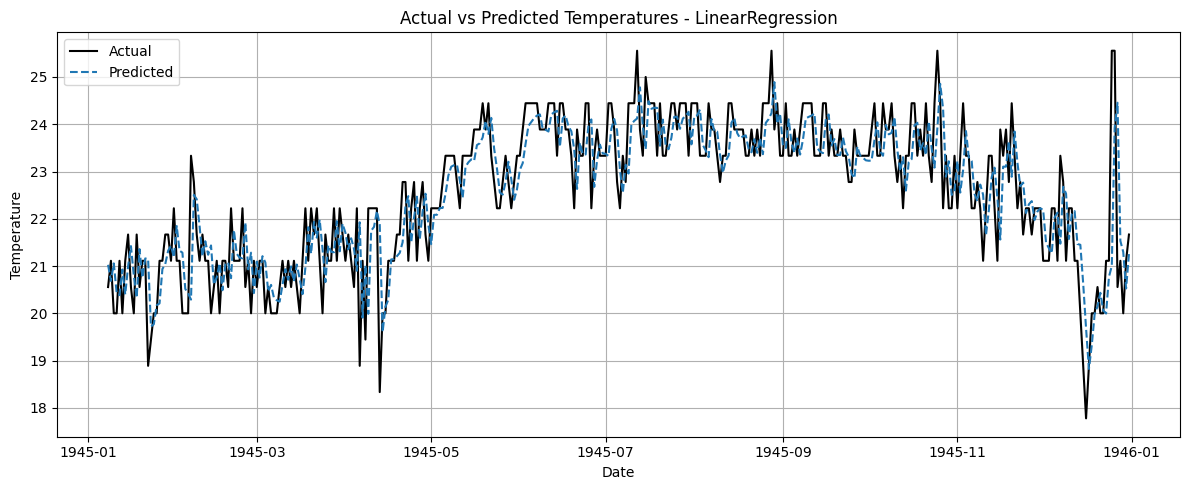

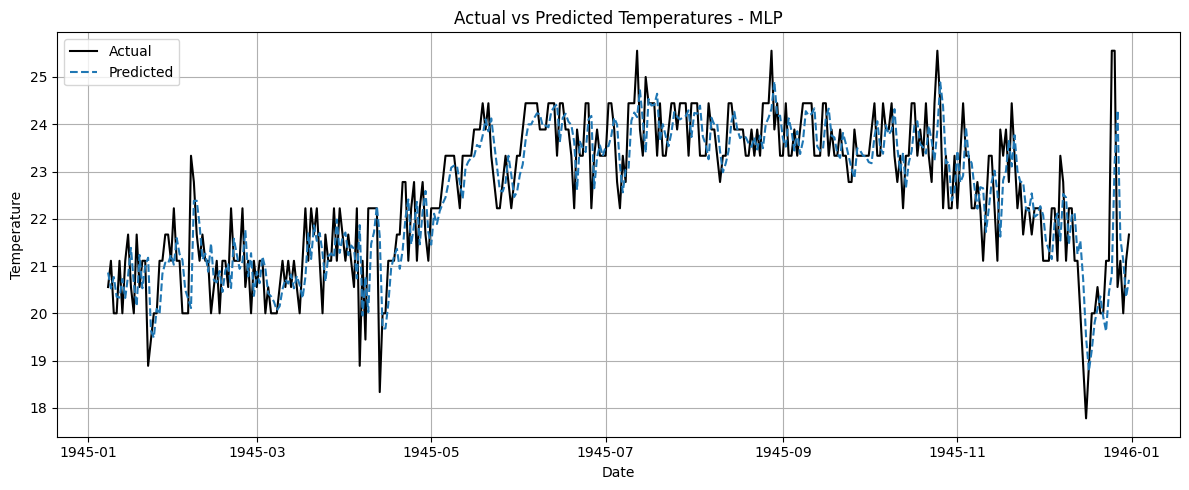

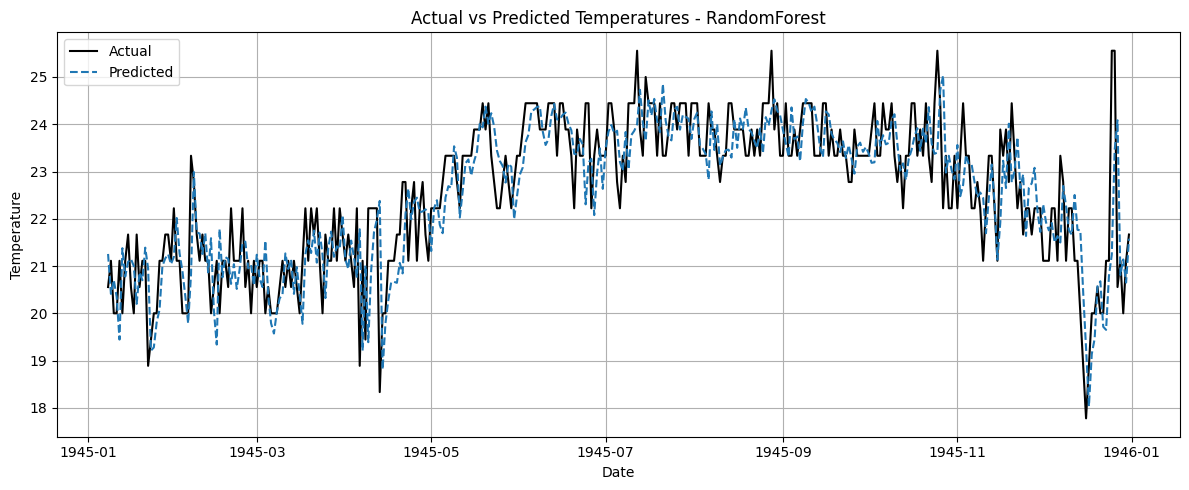

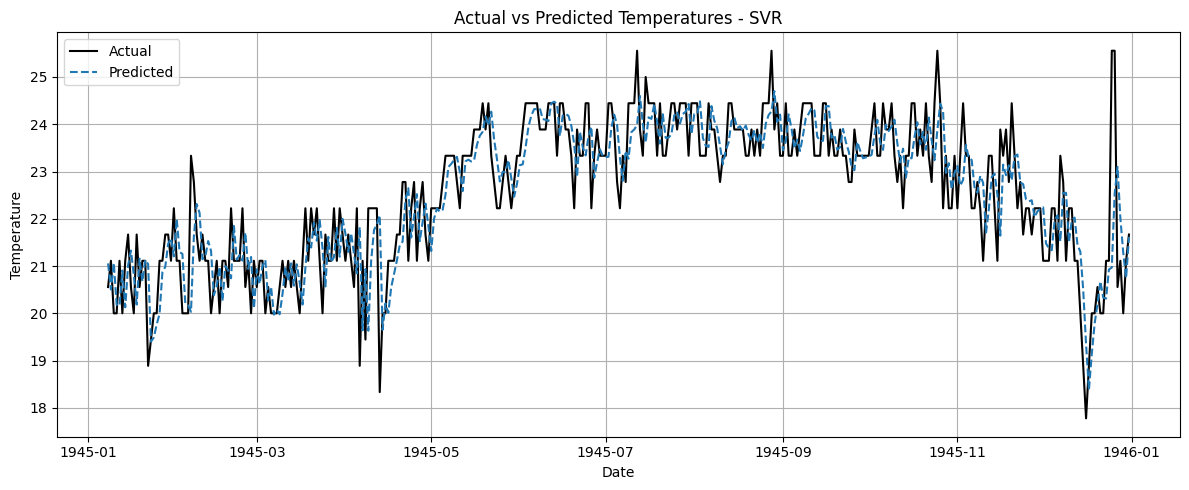

Model Evaluation Results:
{'LinearRegression': {'mean_squared_error': 0.7436237818890125,
                      'r2_score': 0.6796659762733595},
 'MLP': {'mean_squared_error': 0.7642670326598594,
         'r2_score': 0.6707733941057675},
 'RandomForest': {'mean_squared_error': 0.8406951591660341,
                  'r2_score': 0.6378501204210298},
 'SVR': {'mean_squared_error': 0.7585420096381557,
         'r2_score': 0.6732395869644888}}


In [53]:

#Split the data
X_train = Traindata.drop(columns='target')
y_train = Traindata['target']
X_test = TestData.drop(columns='target')
y_test = TestData['target']
print(X_test)
print(y_test)

models = {
    "LinearRegression": LinearRegression(),
    "MLP": MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR()
}

# 5. Fit and evaluate each model
from pprint import pprint

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {"r2_score": r2, "mean_squared_error": mse}

    plt.figure(figsize=(12, 5))
    plt.plot(y_test.index, y_test.values, label='Actual', color='black')
    plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
    plt.title(f'Actual vs Predicted Temperatures - {name}')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# 6. Print results
print("Model Evaluation Results:")
pprint(results)


• Are the two series similar?

 - Yes, they are similar, although, with this seven long windows, it can not predict spikes, but it gets the trend

• Have the seasonality and the trend of the series been correctly predicted?
 
 - Yes, it was correctly predicted in every algorithm

• Are you able to predict a horizon longer than 1 day with this kind of techniques? Why?
 
 - Yes we can, we can make that, we predict 1 day, and the use that prediction to predict another day. But here the error compounds at each prediction into the future.


Try to change the pre-processing step and the hyper-parameters of the pipeline and repeat the analysis to see how your model performance will change.


In [54]:
#Check it with smalller window
#Use a 7 that represents a week
W = 5

records = []

for i in range(W, len(df)):
    window = df['MeanTemp'].iloc[i-W:i].values
    target_date = df.index[i]  # the date of the target (t+W)
    record = dict(zip([f'lag_{j+1}' for j in range(W)], window))
    record['target'] = df['MeanTemp'].iloc[i]  # target is value at t+W
    records.append((target_date, record))

# Build the new structured DataFrame
finaldf = pd.DataFrame(
    data=[r[1] for r in records],
    index=[r[0] for r in records]
)

print(finaldf)

                lag_1      lag_2      lag_3      lag_4      lag_5     target
1940-01-06  20.000000  19.444444  20.000000  21.111111  18.333333  20.000000
1940-01-07  19.444444  20.000000  21.111111  18.333333  20.000000  20.555556
1940-01-08  20.000000  21.111111  18.333333  20.000000  20.555556  18.888889
1940-01-09  21.111111  18.333333  20.000000  20.555556  18.888889  19.444444
1940-01-10  18.333333  20.000000  20.555556  18.888889  19.444444  18.888889
...               ...        ...        ...        ...        ...        ...
1945-12-27  20.000000  21.111111  21.111111  25.555556  25.555556  20.555556
1945-12-28  21.111111  21.111111  25.555556  25.555556  20.555556  21.111111
1945-12-29  21.111111  25.555556  25.555556  20.555556  21.111111  20.000000
1945-12-30  25.555556  25.555556  20.555556  21.111111  20.000000  21.111111
1945-12-31  25.555556  20.555556  21.111111  20.000000  21.111111  21.666667

[2187 rows x 6 columns]


In [55]:
Traindata = finaldf[finaldf.index < '1945-01-14']

TestData = finaldf[finaldf.index >= '1945-01-14']
print(Traindata.tail())
print(TestData.head())

                lag_1      lag_2      lag_3      lag_4      lag_5     target
1945-01-09  21.111111  21.666667  20.555556  21.111111  20.555556  21.111111
1945-01-10  21.666667  20.555556  21.111111  20.555556  21.111111  20.000000
1945-01-11  20.555556  21.111111  20.555556  21.111111  20.000000  20.000000
1945-01-12  21.111111  20.555556  21.111111  20.000000  20.000000  21.111111
1945-01-13  20.555556  21.111111  20.000000  20.000000  21.111111  20.000000
                lag_1      lag_2      lag_3      lag_4      lag_5     target
1945-01-14  21.111111  20.000000  20.000000  21.111111  20.000000  21.111111
1945-01-15  20.000000  20.000000  21.111111  20.000000  21.111111  21.666667
1945-01-16  20.000000  21.111111  20.000000  21.111111  21.666667  20.555556
1945-01-17  21.111111  20.000000  21.111111  21.666667  20.555556  20.000000
1945-01-18  20.000000  21.111111  21.666667  20.555556  20.000000  21.666667


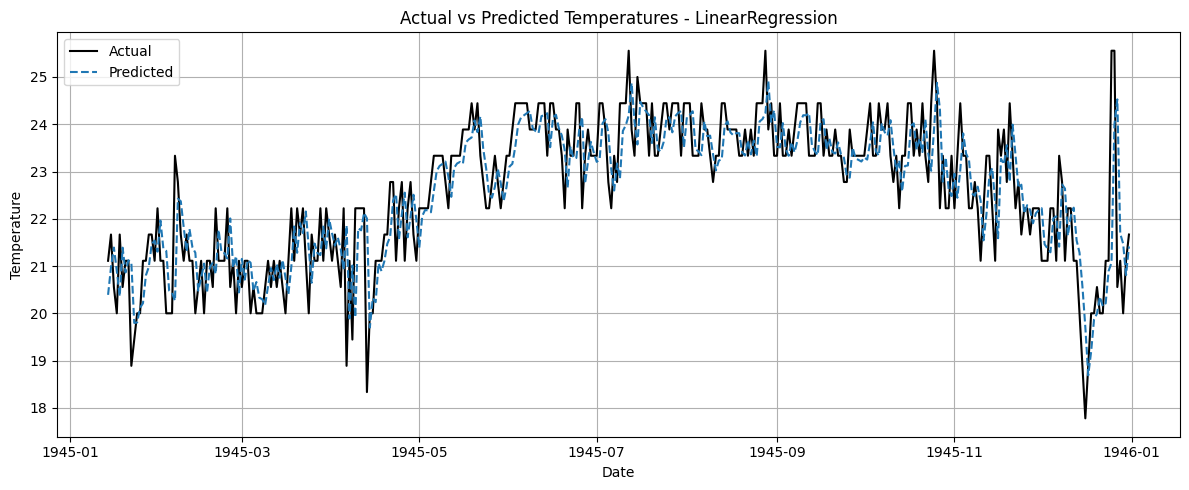

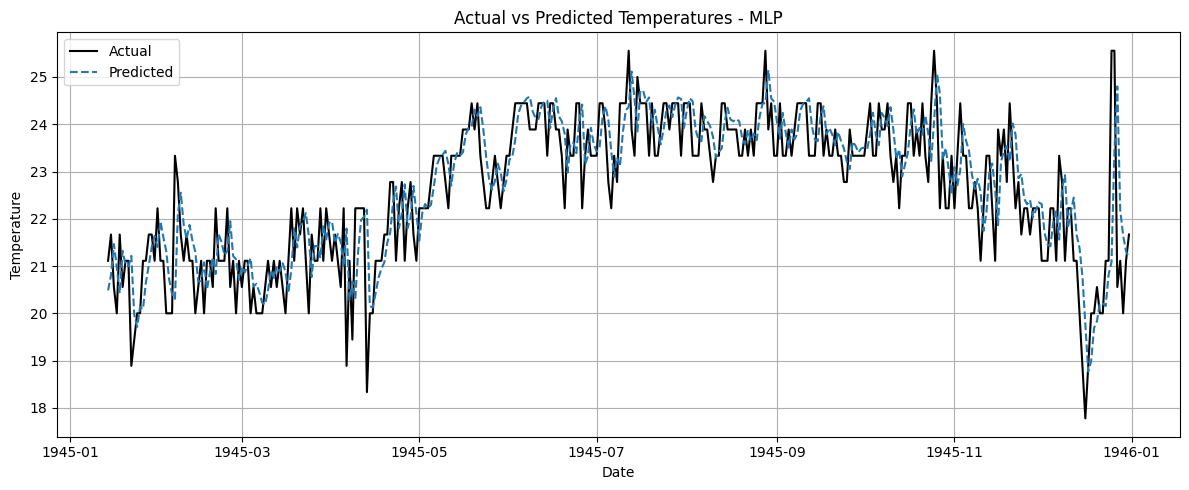

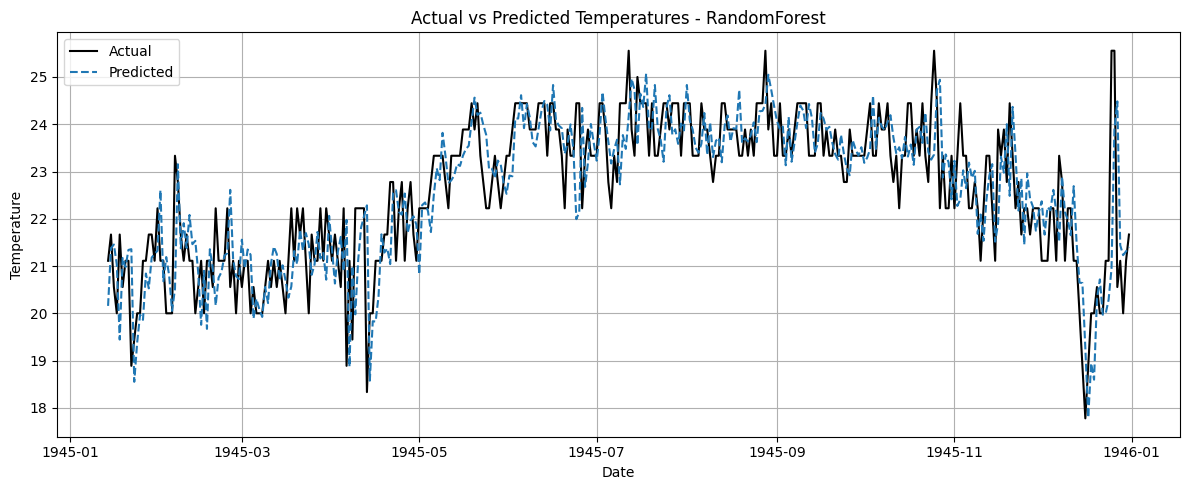

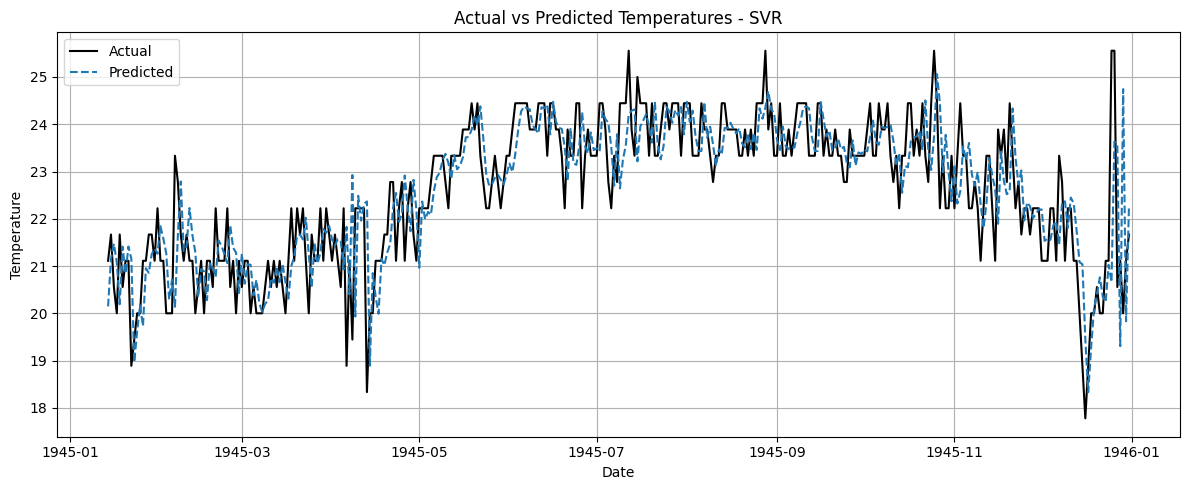

Model Evaluation Results:
{'LinearRegression': {'mean_squared_error': 0.753267827423889,
                      'r2_score': 0.6697998847628742},
 'MLP': {'mean_squared_error': 0.8013419433751326,
         'r2_score': 0.6487262665236464},
 'RandomForest': {'mean_squared_error': 0.9338939346601323,
                  'r2_score': 0.5906211925994055},
 'SVR': {'mean_squared_error': 0.9176288186530964,
         'r2_score': 0.597751117686258}}


In [56]:
#Split the data
X_train = Traindata.drop(columns='target')
y_train = Traindata['target']
X_test = TestData.drop(columns='target')
y_test = TestData['target']



#Change some model parameter
models = {
    "LinearRegression": LinearRegression(),
    "MLP": MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "SVR": SVR(kernel='rbf', C=100, epsilon=0.1)
}

# 5. Fit and evaluate each model
from pprint import pprint

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {"r2_score": r2, "mean_squared_error": mse}

    plt.figure(figsize=(12, 5))
    plt.plot(y_test.index, y_test.values, label='Actual', color='black')
    plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
    plt.title(f'Actual vs Predicted Temperatures - {name}')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# 6. Print results
print("Model Evaluation Results:")
pprint(results)